In [3]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="white", color_codes=True)

from deepymod_torch.library_function import *
from deepymod_torch.DeepMod import DeepMoD
from deepymod_torch.neural_net import *
from deepymod_torch.sparsity import *

torch.set_default_tensor_type('torch.cuda.FloatTensor')

np.random.seed(40)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
try:
    torch.set_default_tensor_type('torch.cuda.FloatTensor')  # enable for GPU
except:
    pass
torch.cuda.is_available()

True

In [5]:
def shift(test):
    return test[:-1]+np.diff(test)[0]/2

Loading in the data as a data-frame 

In [6]:
myFile_pd = pd.read_csv('trimed.CSV', sep=',')

In [8]:
myFile_pd

,Unnamed: 0,x0,y0,size : 0,x1,y1,size : 1,x2,y2,size : 2,x3,y3,size : 3,x4,y4,size : 4,x5,y5,size : 5
0,0,1573.5,372.5,0.000003,1621.0,548.0,0.000004,1142.5,248.0,0.000002,1073.5,84.5,0.000003,630.0,230.0,0.000003,1273.0,653.5,0.000002
1,1,1573.5,373.5,NaN,1620.5,547.5,NaN,1144.5,247.5,NaN,1074.5,84.0,NaN,631.0,230.5,NaN,1273.0,652.0,NaN
2,2,1573.5,373.5,NaN,1621.5,547.5,NaN,1143.5,248.0,NaN,1075.0,85.0,NaN,630.0,229.5,NaN,1274.5,651.5,NaN
3,3,1573.0,372.5,NaN,1622.0,548.0,NaN,1144.0,247.0,NaN,1073.0,85.5,NaN,629.5,228.5,NaN,1273.0,651.0,NaN
4,4,1573.0,372.0,NaN,1621.5,547.5,NaN,1144.0,248.0,NaN,1073.0,85.0,NaN,629.5,229.5,NaN,1274.0,650.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2855,2855,1575.5,379.0,NaN,1586.0,578.0,NaN,1170.5,381.5,NaN,1055.0,152.0,NaN,558.0,333.5,NaN,1233.5,666.5,NaN
2856,2856,1576.0,378.0,NaN,1584.5,578.5,NaN,1169.5,382.0,NaN,1055.5,152.0,NaN,558.0,332.5,NaN,1233.5,667.0,NaN
2857,2857,1574.5,377.5,NaN,1585.0,578.0,NaN,1169.5,382.5,NaN,1056.0,152.0,NaN,558.0,333.5,NaN,1234.0,668.0,NaN
2858,2858,1575.0,378.0,NaN,1584.5,578.5,NaN,1169.5,382.5,NaN,1055.5,151.5,NaN,558.5,333.5,NaN,1234.0,666.5,NaN


Selecting the x and y values of the data and substacting the initial position to make all particles start at (x,y) = (0,0)

In [9]:
x_list = pd.concat([myFile_pd['x0'],myFile_pd['x1'],myFile_pd['x2'],myFile_pd['x3'],myFile_pd['x4'],myFile_pd['x5']],axis=1)
y_list = pd.concat([myFile_pd['x0'],myFile_pd['y1'],myFile_pd['y2'],myFile_pd['y3'],myFile_pd['y4'],myFile_pd['y5']],axis=1)
x_list = x_list-x_list.values.squeeze()[0]
y_list = y_list-y_list.values.squeeze()[0]

In [10]:
x_position_array = np.asarray(x_list.values.squeeze())
y_position_array = np.asarray(y_list.values.squeeze())

m is the amount of individual trajectories that you want to split your dataset into.

In [11]:
m = 180
L_cuts = np.int(x_position_array.shape[0]/m)
x_array = x_position_array[0:L_cuts][:,1:]
y_array = y_position_array[0:L_cuts][:,1:]

In [12]:
for i in range(1,m):
    temp_array_x= x_position_array[i*L_cuts:(i+1)*L_cuts] - x_position_array[i*L_cuts]
    temp_array_y= y_position_array[i*L_cuts:(i+1)*L_cuts] - y_position_array[i*L_cuts]
    x_array= np.hstack((x_array,temp_array_x[:,1:]))
    y_array= np.hstack((y_array,temp_array_y[:,1:]))

In [13]:
msd = np.sqrt(x_array**2 + y_array**2)

In [14]:
import seaborn as sns;

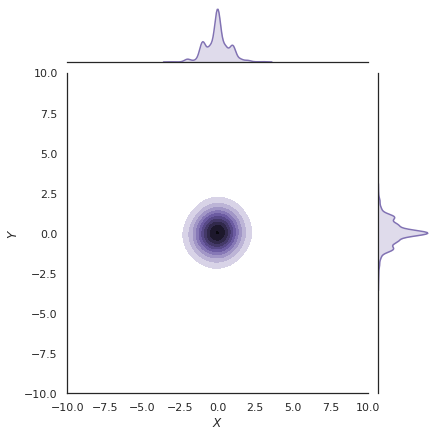

In [17]:
time=1
g = sns.jointplot(x=x_array[time],y=y_array[time], kind="kde", color="m",xlim=(-10,10),ylim=(-10,10), bw=0.75)
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

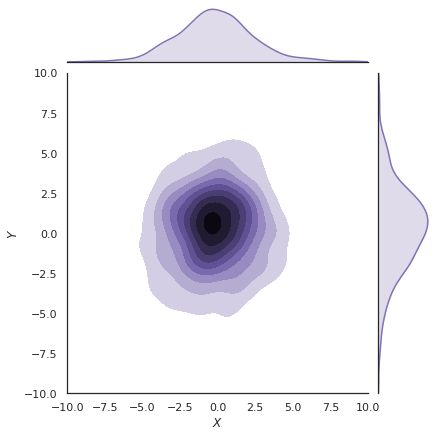

In [16]:
time=
g = sns.jointplot(x=x_array[time],y=y_array[time], kind="kde", color="m",xlim=(-10,10),ylim=(-10,10), bw=0.75)
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

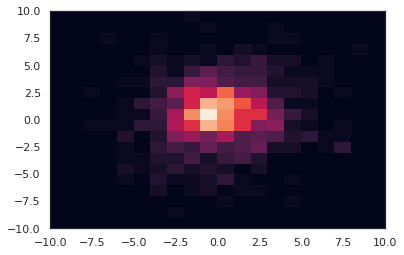

In [587]:
time = 13
plt.hist2d(x=x_array[time],y=y_array[time],bins=20,range=[[-10,10],[-10,10]],density=True)
plt.show()

In [22]:
histo=np.histogram2d(x=x_array[0],y=y_array[0],bins=20,range=[[-10,10],[-10,10]])
U = np.empty(histo[0].shape).flatten()
x_m, y_m = np.meshgrid(histo[1].flatten()[:-1], histo[1].flatten()[:-1])
X_m= np.empty(x_m.shape).flatten()
Y_m= np.empty(y_m.shape).flatten()
T = np.empty(x_m.shape).flatten()

In [23]:
for t in range(1,len(x_array)):
    histo=np.histogram2d(x=x_array[t],y=y_array[t],bins=20,range=[[-10,10],[-10,10]])
    u = histo[0].flatten()
    x_m, y_m = np.meshgrid(shift(histo[1].flatten()), shift(histo[1].flatten()))
    t = t*np.ones_like(x_m).flatten()
    X_m = np.vstack([X_m,x_m.flatten()])
    Y_m = np.vstack([Y_m,y_m.flatten()])
    T = np.vstack([T,t])
    U = np.vstack([U,u])
X_m= X_m[1:]
Y_m= Y_m[1:]
T = T[1:]
U = U[1:]

In [24]:
X_m.shape

(14, 400)

# DeepMoD applied on the SPT data

In [25]:
X = np.transpose((T.flatten(),X_m.flatten(), Y_m.flatten()))
y = U.reshape((U.size, 1))
y = y/10.
print(X.shape, y.shape)

(5600, 3) (5600, 1)


In [26]:
X[:,1].reshape

<function ndarray.reshape>

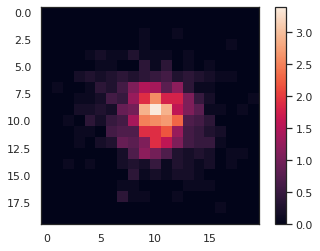

In [27]:
plt.imshow(y[:].reshape(14,20,20)[12,:,:])
plt.colorbar()

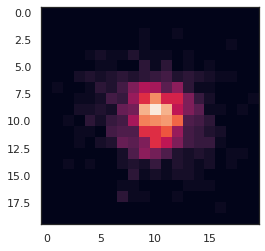

In [28]:
plt.imshow(U.reshape(14,20,20)[12,:,:])

In [29]:
number_of_samples = 5000

idx = np.random.permutation(y.size)
X_train = torch.tensor(X[idx, :][:number_of_samples], dtype=torch.float32, requires_grad=True)
y_train = torch.tensor(y[idx, :][:number_of_samples], dtype=torch.float32)

In [30]:
print(X_train.shape, y_train.shape)

torch.Size([5000, 3]) torch.Size([5000, 1])


In [31]:
optim_config = {'lambda': 10**-7, 'max_iterations': 10001}

In [32]:
network_config = {'input_dim': 3, 'hidden_dim': 20, 'layers': 3, 'output_dim': y_train.shape[1]}

In [33]:
library_config = {'type': library_2D_in_PINN_group, 'poly_order': 0, 'diff_order': 2}

In [34]:
network, coeff_vector_list, sparsity_mask_list = deepmod_init(network_config, library_config)

1


In [35]:
coeff_vector_list_new = [torch.tensor(0.1*coeff_vector+ 1, dtype=torch.float32, requires_grad=True) for coeff_vector in coeff_vector_list ]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


In [36]:
train_group_mse(X_train, y_train, network, coeff_vector_list_new, sparsity_mask_list, library_config, optim_config)

Epoch | Total loss | MSE | PI | L1 
0 7.5E-01 7.5E-01
5000 1.1E-02 1.1E-02
10000 9.3E-03 9.3E-03


In [630]:
time_deriv_list, theta, coeff_vector_list = train_group(X_train, y_train, network, coeff_vector_list_new, sparsity_mask_list, library_config, optim_config)

Epoch | Total loss | MSE | PI | L1 
0 6.9E-03 6.2E-03 7.2E-04 1.6E-07 1.6E-07
tensor([[0.0003],
        [0.0386],
        [0.0503],
        [0.0265]], requires_grad=True)
5000 5.9E-03 5.2E-03 7.4E-04 1.5E-07 1.5E-07
tensor([[-0.0037],
        [ 0.0419],
        [ 0.0361],
        [ 0.0148]], requires_grad=True)
10000 5.4E-03 4.7E-03 6.8E-04 1.5E-07 1.5E-07
tensor([[-0.0003],
        [ 0.0473],
        [ 0.0352],
        [ 0.0107]], requires_grad=True)


In [631]:
coeff_vector_list 

[tensor([[-0.0003],
         [ 0.0473],
         [ 0.0352],
         [ 0.0107]], requires_grad=True)]

In [37]:
X_all = torch.tensor(X, dtype=torch.float32, requires_grad=True) 
prediction_full = network(X_all).cpu()

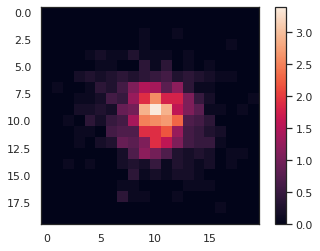

In [52]:
plt.imshow(y[:].reshape(14,20,20)[12,:,:])
plt.colorbar()

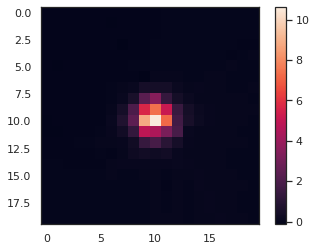

In [53]:
plt.imshow(prediction_full.detach().numpy().reshape(14,20,20)[2,:,:], aspect=1)
plt.colorbar()

In [73]:
np.unique(x_array[2, :])

array([-3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,
        2.5,  3. ])

In [74]:
np.unique(x_array[12, :])

array([-8. , -7. , -6.5, -6. , -5.5, -5. , -4.5, -4. , -3.5, -3. , -2.5,
       -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,
        3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  7. ,  8. , 10. ])

(-5, 5)

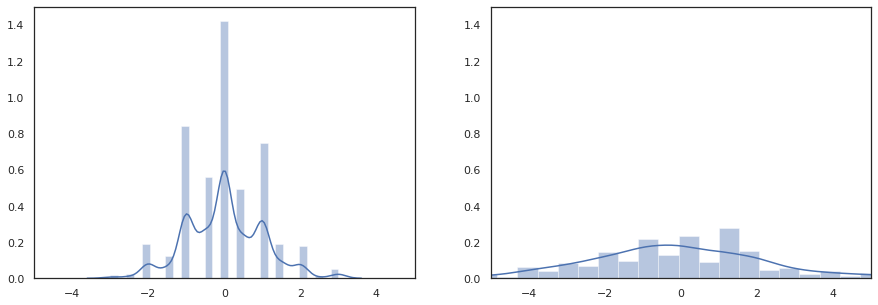

In [70]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
sns.distplot(x_array[2, :], bins='auto')
plt.ylim([0, 1.5])
plt.xlim([-5, 5])

plt.subplot(122)
sns.distplot(x_array[12, :], bins='auto')
plt.ylim([0, 1.5])
plt.xlim([-5, 5])

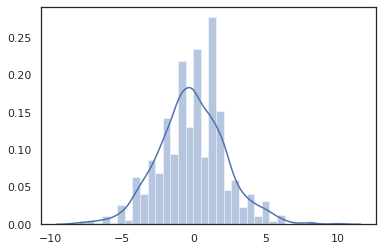

In [62]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
sns.distplot(x_array[2, :], bins='auto')
plt.ylim([0, 1.5])
plt.xlim([-5, 5])

plt.subplot(122)
sns.distplot(x_array[12, :], bins='auto')
plt.ylim([0, 1.5])
plt.xlim([-5, 5])

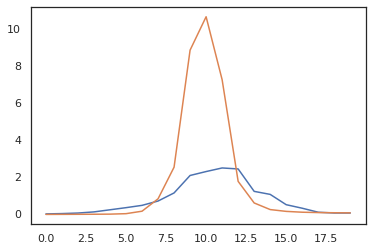

In [49]:
plt.plot(prediction_full.detach().numpy().reshape(14,20,20)[13,10,:])
plt.plot(prediction_full.detach().numpy().reshape(14,20,20)[2,10,:])

# DeepMoD applied on some artificial data

In [509]:
data_1 =  loadmat('../data/processed/Diffusion_2D_D01.mat')
usol = np.real(data_1['Expression1'])
usol= usol.reshape((26,26,21,4))

x_1 = usol[:,:,:,0]
y_1 = usol[:,:,:,1]
t_1 = usol[:,:,:,2]
u = usol[:,:,:,3]
X = np.transpose((t_1.flatten(),x_1.flatten(),y_1.flatten()))
#y= y_1.reshape((y_1.size, 1)).astype('float32')
y= u.reshape((u.size, 1)).astype('float32')

noise_level = 0.1
y= y + noise_level * np.std(y) * np.random.randn(y.size, 1)

In [336]:
u= u + noise_level * np.std(u) * np.random.randn(u.shape[0],u.shape[1],u.shape[2])

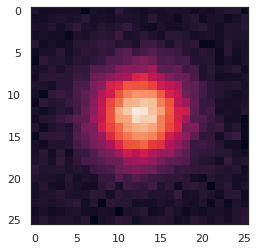

In [337]:
time = 18
plt.imshow(u[:,:,time])
plt.show()

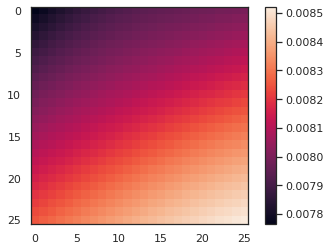

In [333]:
plt.imshow(prediction_full.detach().numpy().reshape(26,26,21)[:,:,10].T, aspect=1)
plt.colorbar()

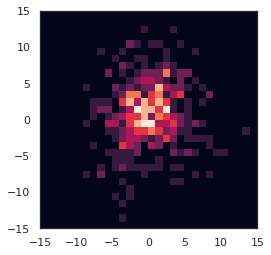

In [431]:
time = 30
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist2d(x=x_array[time],y=y_array[time],bins=30,range=[[-15,15],[-15,15]])
ax.set_aspect(aspect=1)

# Find the maximal values

In [283]:
U = np.empty(histo[0].shape).flatten()
for t in range(1,len(x_array)):
    print(t)
    histo=np.histogram2d(x=x_array[t],y=y_array[t],bins=20,range=[[-10,10],[-10,10]])
    u = histo[0].flatten()
    x_m, y_m = np.meshgrid(histo[1].flatten()[:-1], histo[1].flatten()[:-1])
    t = np.ones_like(x_m).flatten()
    U = np.vstack([U,u])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [161]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 4))

im0 = axes[0].contourf(x_m, y_v, u, cmap='coolwarm')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('t = 0')

im1 = axes[1].contourf(x_v[:,:,10], y_v[:,:,10], u_v[:,:,10], cmap='coolwarm')
axes[1].set_xlabel('x')
axes[1].set_title('t = 10')

im2 = axes[2].contourf(x_v[:,:,20], y_v[:,:,20], u_v[:,:,20], cmap='coolwarm')
axes[2].set_xlabel('x')
axes[2].set_title('t= 20')

fig.colorbar(im1, ax=axes.ravel().tolist())

plt.show()

In [162]:
x_m.shape

(41, 1600)

In [132]:
for i in range(0,len(x_array)):
    histo=np.histogram2d(x=x_array[i],y=y_array[i],bins=40)[0]
    position_max=np.where(histo == np.amax(histo))
    if len(position_max[0]) ==1:
        print(np.squeeze(position_max))
    else:
        print(np.squeeze(position_max[0]))

[20 20]
[20 16]
[20 20]
[17 22]
[20 20]
[17 22]
[16 20]
[21 16]
[21 17]
[24 18]
[23 20]
[22 22]
[21 21]
[18 21]
[21 18]
[21 18]
[15 20]
[14 21]
[14 16]
[16 21]
[14 21]


In [113]:
histo=np.histogram2d(x=x_array[5],y=y_array[5],bins=20)[0]
position_max=np.where(histo == np.amax(histo))
print(position_max)

(array([ 8, 11]), array([11, 11]))


In [114]:
np.amax(histo)

20.0

In [117]:
len(np.where(histo == np.amax(histo)))

2